<a href="https://colab.research.google.com/github/SK-15/Image-Classifier/blob/master/Types_Flower_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os 
import numpy as np
import glob
import shutil
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [ ]:
_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
zip_file = tf.keras.utils.get_file(origin = _URL, fname = 'flower_photos.tgz', extract = True)

base_dir = os.path.join(os.path.dirname(zip_file),'flower_photos')

228818944/228813984 [==============================] - 4s 0us/step


In [ ]:
classes = ['roses', 'daisy', 'dandelion', 'sunflowers', 'tulips']

In [ ]:
for cl in classes:
  image_path = os.path.join(base_dir,cl)
  image = glob.glob(image_path + '/*.jpg')
  print("{}: {} Images".format(cl, len(image)))
  train, val = image[:round(len(image)*0.8)], image[round(len(image)*0.8):]
  
  for tr in train:
    if not os.path.exists(os.path.join(base_dir, 'train', cl)):
      os.makedirs(os.path.join(base_dir, 'train', cl))
    shutil.move(tr, os.path.join(base_dir, 'train', cl))
    
  for v in val:
    if not os.path.exists(os.path.join(base_dir, 'val', cl)):
      os.makedirs(os.path.join(base_dir, 'val', cl))
    shutil.move(v, os.path.join(base_dir, 'val', cl))

roses: 641 Images
daisy: 633 Images
dandelion: 898 Images
sunflowers: 699 Images
tulips: 799 Images


In [ ]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

In [ ]:
batch_size = 100
IMG_SHAPE = 150

In [ ]:
img_gen = ImageDataGenerator(rescale = 1./255, horizontal_flip = True, rotation_range = 45, 
                             zoom_range = 0.5, width_shift_range = 0.15, height_shift_range = 0.15) 
train_data_gen = img_gen.flow_from_directory(batch_size = batch_size,
                                             directory = train_dir,
                                             shuffle = True,
                                             target_size = (IMG_SHAPE,IMG_SHAPE)) 

Found 2935 images belonging to 5 classes.


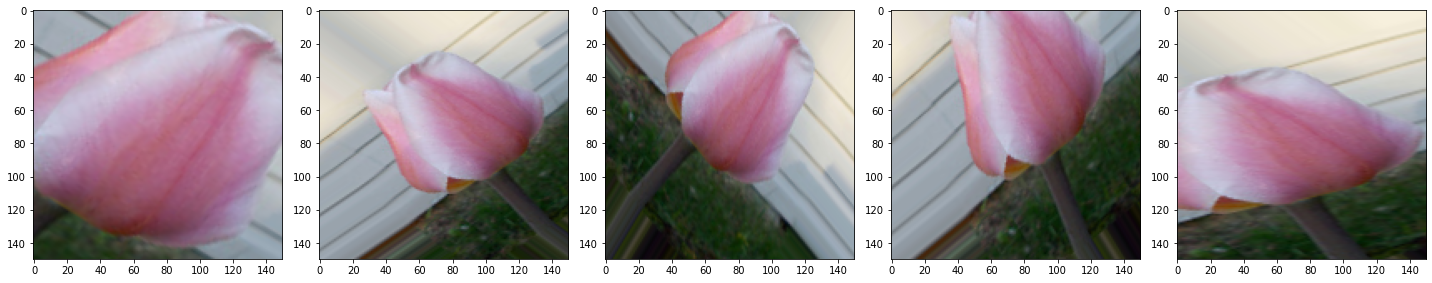

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [ ]:
image_gen_val = ImageDataGenerator(rescale = 1./255, zoom_range = 0.5,
                                   horizontal_flip = True, rotation_range = 45,
                                   height_shift_range = 0.15, width_shift_range = 0.15)
val_data_gen = image_gen_val.flow_from_directory(batch_size = batch_size,
                                            directory = val_dir,
                                            shuffle = True,
                                            target_size = (IMG_SHAPE,IMG_SHAPE))

Found 735 images belonging to 5 classes.


In [ ]:
model = Sequential()

model.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_SHAPE,IMG_SHAPE,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32,3, padding='same', activation = 'relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,3, padding='same', activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(5))

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs = 80

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(train_data_gen.n / float(batch_size))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(val_data_gen.n / float(batch_size)))
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/80
30/30 [==============================] - 29s 968ms/step - loss: 1.8906 - accuracy: 0.2739 - val_loss: 1.4472 - val_accuracy: 0.3293
Epoch 2/80
30/30 [==============================] - 29s 974ms/step - loss: 1.3228 - accuracy: 0.4382 - val_loss: 1.1575 - val_accuracy: 0.5102
Epoch 3/80
30/30 [==============================] - 29s 968ms/step - loss: 1.1496 - accuracy: 0.5397 - val_loss: 1.0636 - val_accuracy: 0.6150
Epoch 4/80
30/30 [==============================] - 29s 975ms/step - loss: 1.0975 - accuracy: 0.5639 - val_loss: 1.0122 - val_accuracy: 0.5905
Epoch 5/80
30/30 [==============================] - 29s 965ms/step - loss: 1.0340 - accuracy: 0.5966 - val_loss: 0.9326 - val_accuracy: 0.6313
Epoch 6/80
30/30 [==============================] - 29s 974ms/step - loss: 0.9886 - accuracy: 0.6106 - val_loss: 0.8974 - val_accuracy: 0.6490
Epoch 7/80
30/30 [==============================] - 29s 983ms/step

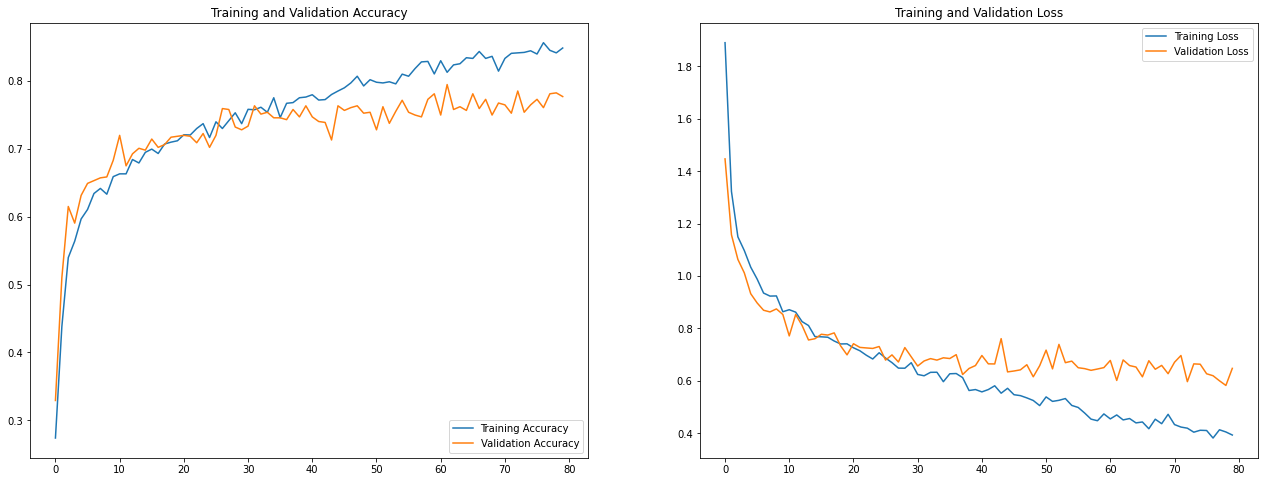

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(22, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()